# Restaurent Recommendation

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns



In [40]:
file_path = r'C:\Users\manis\OneDrive\Desktop\Dataset .csv'
df = pd.read_csv(file_path)

In [41]:
print(df.head())
print(df.columns)

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [39]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [42]:
# Handle missing values
df.fillna('', inplace=True)

# Encode categorical variables if needed
# Example: df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)


In [51]:
# Define user preferences (sample)
user_preferences = {
      'Restaurant Name': 'Villa Tevere',
    'Cuisines': 'Italian',
    'Price range': 4  # Assuming 1 for low, 2 for medium, and 3 for high
}


In [52]:
# Create TF-IDF matrix for Cuisines
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cuisines'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get indices of restaurants similar to user preferences
indices = pd.Series(df.index, index=df['Restaurant Name']).drop_duplicates()

def get_recommendations(user_preferences, cosine_sim=cosine_sim):
    idx = indices[user_preferences['Restaurant Name']]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]
    return df.iloc[restaurant_indices]

recommendations = get_recommendations(user_preferences)


In [65]:
def get_recommendations(user_preferences, cosine_sim=cosine_sim):
    idx = indices[user_preferences['Restaurant Name']]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Define simscores here
    simscores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    simscores = simscores[1:11]  # Get top 10 similar restaurants

    restaurant_indices = [i[0] for i in simscores]
    return df.iloc[restaurant_indices]


In [66]:
# Sample user preferences
sample_preferences = {
    'Restaurant Name': 'Villa Tevere',
    'Cuisines': 'Italian',
    'Price range': 4  # Assuming 1 for low, 2 for medium, and 3 for high
}

test_recommendations = get_recommendations(sample_preferences)
print(test_recommendations[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating']])

                       Restaurant Name Cuisines  Price range  Aggregate rating
40                                Gero  Italian            4               3.3
53                    D.O.C Ristorante  Italian            4               4.0
76                    Terra�_o It��lia  Italian            4               4.4
115           La Dolce Vita Ristorante  Italian            3               4.1
217  Tony's Italian Restaurant & Pizza  Italian            2               3.7
233                 Trattoria Tiramisu  Italian            2               4.1
274                   Vinny Vanucchi's  Italian            2               3.4
335                   My Fathers Place  Italian            2               3.7
357            Maggiano's Little Italy  Italian            4               4.4
463               Fratini La Trattoria  Italian            4               4.1


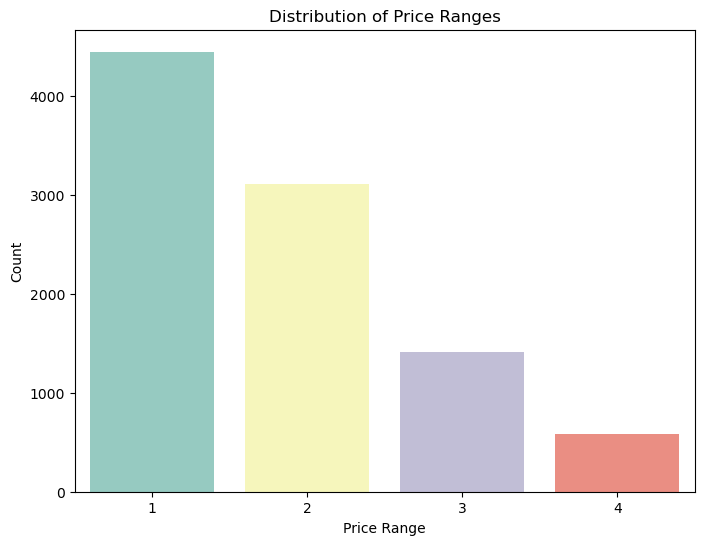

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Price range', palette='Set3')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


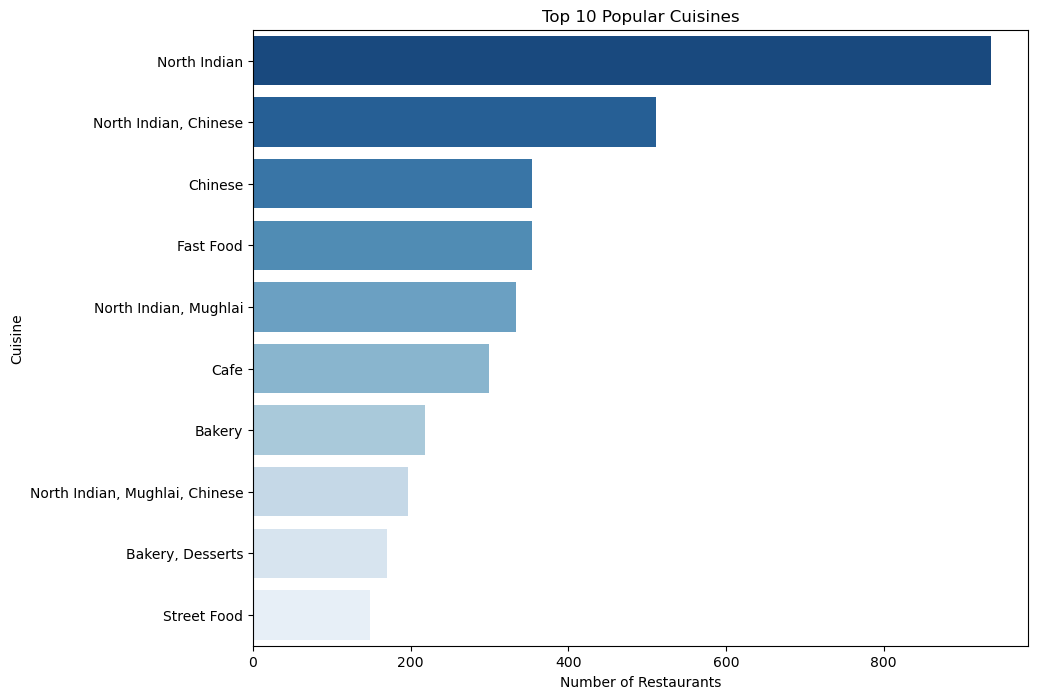

In [71]:
plt.figure(figsize=(10, 8))
top_cuisines = df['Cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Blues_r')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


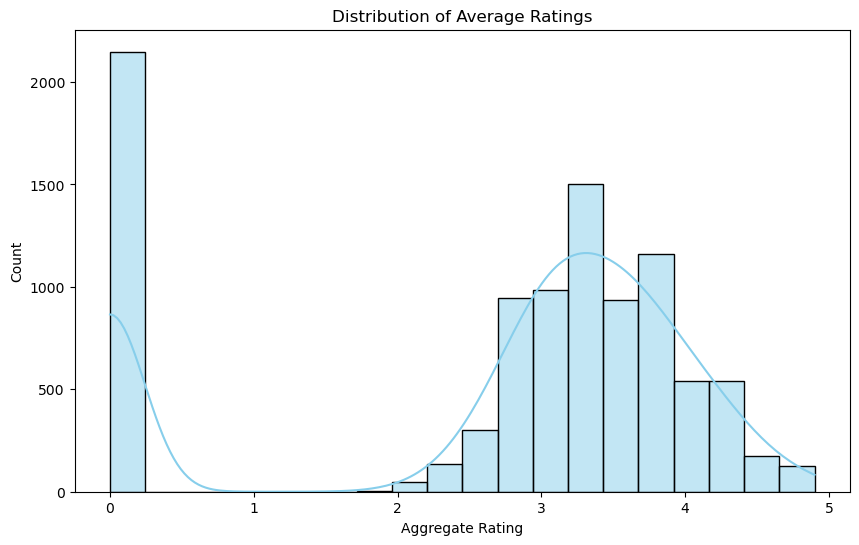

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Aggregate rating', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


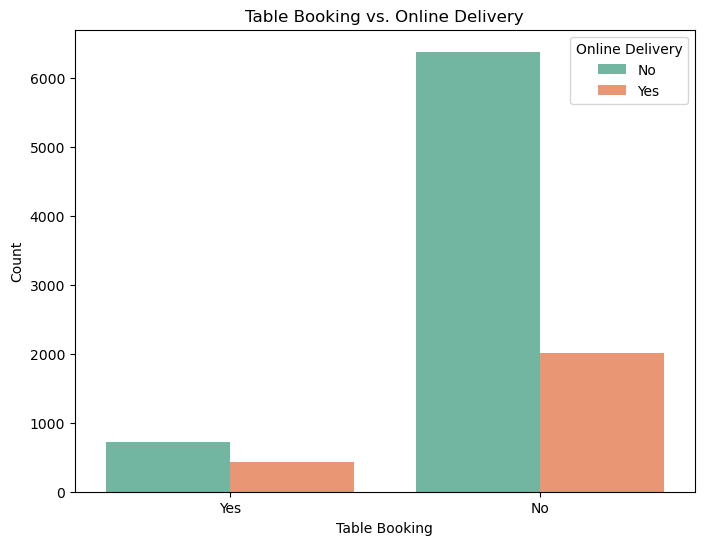

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Has Table booking', hue='Has Online delivery', palette='Set2')
plt.title('Table Booking vs. Online Delivery')
plt.xlabel('Table Booking')
plt.ylabel('Count')
plt.legend(title='Online Delivery', loc='upper right')
plt.show()


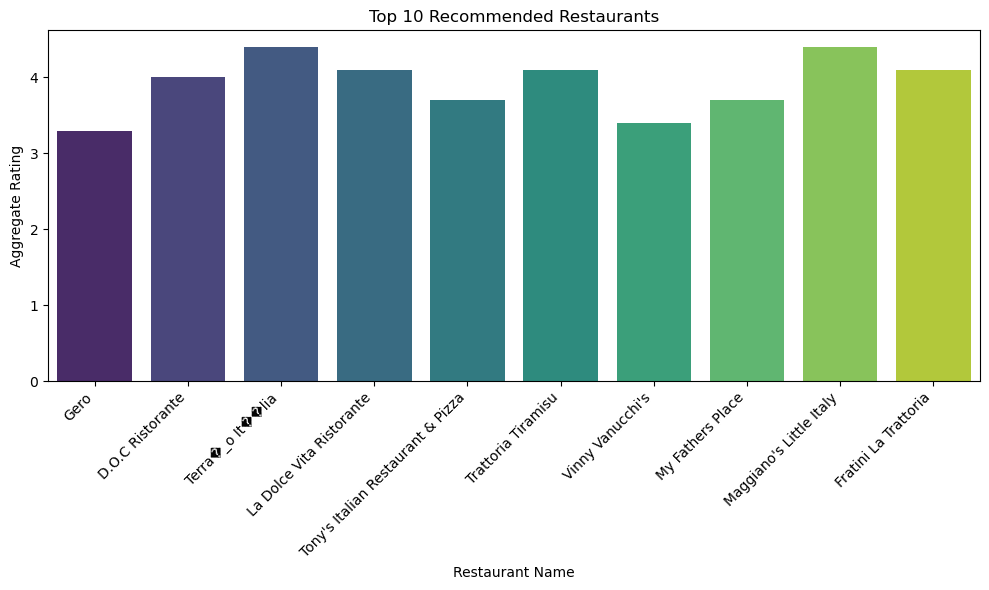

In [69]:
# Get recommendations
recommended_restaurants = get_recommendations(sample_preferences)

# Extract ratings from recommended restaurants
ratings = recommended_restaurants['Aggregate rating']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=recommended_restaurants['Restaurant Name'], y=ratings, palette='viridis')
plt.title('Top 10 Recommended Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


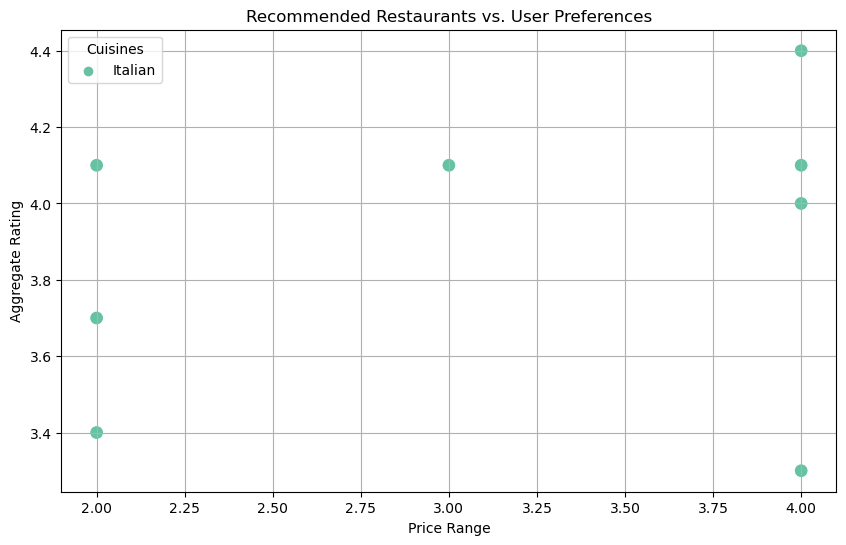

In [74]:
# Sample user preferences
sample_preferences = {
    'Restaurant Name': 'Villa Tevere',
    'Cuisines': 'Italian',
    'Price range': 4  # Assuming 1 for low, 2 for medium, and 3 for high
}

# Get recommendations
recommended_restaurants = get_recommendations(sample_preferences)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of aggregate ratings vs. price range
sns.scatterplot(x=recommended_restaurants['Price range'], y=recommended_restaurants['Aggregate rating'], hue=recommended_restaurants['Cuisines'], palette='Set2', s=100)
plt.title('Recommended Restaurants vs. User Preferences')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.legend(title='Cuisines', loc='upper left')
plt.grid(True)
plt.show()
